In [2]:
import numpy as np
import pandas as pd
import pickle

In [3]:
# Raw data
features = pd.read_csv('../Data/FormattedTraining/ShadowVideosPhotosAugmented/data.csv')
labels = pd.read_csv('../Data/FormattedTraining/ShadowVideosPhotosAugmented/target.csv')
# Even spread of boxing vs non boxing (1-2)
#features = pd.read_csv('../Data/FormattedTraining/ShadowVideos/data_even.csv')
#labels = pd.read_csv('../Data/FormattedTraining/ShadowVideos/target_even.csv')
feature_names = pd.read_csv('../Data/FormattedTraining/ShadowVideosPhotosAugmented/feature_names.csv')
label_names = ['Boxing','Not Boxing']

labels = np.ravel(labels.as_matrix(columns=None))
feature_names = np.ravel(feature_names.as_matrix(columns=None))
features = features.as_matrix(columns=None)
type(features)

numpy.ndarray

In [4]:
print(labels.shape)
print(feature_names.shape)
print(features.shape)
feature_names

(1095171,)
(51,)
(1095171, 51)


array(['Pelvis_x', 'R_Hip_x', 'R_Leg_x', 'R_Foot_x', 'L_Hip_x', 'L_Leg_x',
       'L_Foot_x', 'Belly_x', 'Thorax_x', 'Neck_x', 'Head_x',
       'L_Shoulder_x', 'L_Arm_x', 'L_Hand_x', 'R_Shoulder_x', 'R_Arm_x',
       'R_Hand_x', 'Pelvis_y', 'R_Hip_y', 'R_Leg_y', 'R_Foot_y', 'L_Hip_y',
       'L_Leg_y', 'L_Foot_y', 'Belly_y', 'Thorax_y', 'Neck_y', 'Head_y',
       'L_Shoulder_y', 'L_Arm_y', 'L_Hand_y', 'R_Shoulder_y', 'R_Arm_y',
       'R_Hand_y', 'Pelvis_z', 'R_Hip_z', 'R_Leg_z', 'R_Foot_z', 'L_Hip_z',
       'L_Leg_z', 'L_Foot_z', 'Belly_z', 'Thorax_z', 'Neck_z', 'Head_z',
       'L_Shoulder_z', 'L_Arm_z', 'L_Hand_z', 'R_Shoulder_z', 'R_Arm_z',
       'R_Hand_z'], dtype=object)

In [5]:
# Look at our data
print(label_names)
print(labels[0])
print(feature_names[0])
print(features[0])

['Boxing', 'Not Boxing']
0
Pelvis_x
[ 469.4     329.6     460.3     703.64    609.2     718.29    775.51
  416.04    400.38    380.45    432.61    614.13    656.03    744.33
  157.21    -86.01   -297.37     98.073    40.028  -282.9    -479.82
  156.12   -185.05   -454.19    184.45    183.83    117.73    142.4     242.11
  390.      335.39    169.29    364.46    132.93    -20.84    -48.578
  244.92    189.59      6.8984  302.19    187.15      5.0915  -28.924
  104.62    302.77     -1.2804 -134.62   -319.4    -105.78   -498.5    -596.74  ]


In [6]:
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.01)

In [7]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(40, 30, 20, 10, 5, 2), learning_rate= 'adaptive', random_state=1, verbose=True)
clf.fit(train, train_labels)

Iteration 1, loss = 0.23611936
Iteration 2, loss = 0.18606762
Iteration 3, loss = 0.17078826
Iteration 4, loss = 0.16201246
Iteration 5, loss = 0.15478867
Iteration 6, loss = 0.15002234
Iteration 7, loss = 0.14622850
Iteration 8, loss = 0.14325546
Iteration 9, loss = 0.14010270
Iteration 10, loss = 0.13802041
Iteration 11, loss = 0.13579457
Iteration 12, loss = 0.13504552
Iteration 13, loss = 0.13268278
Iteration 14, loss = 0.13117150
Iteration 15, loss = 0.13140797
Iteration 16, loss = 0.12925088
Iteration 17, loss = 0.12830261
Iteration 18, loss = 0.12737117
Iteration 19, loss = 0.12644747
Iteration 20, loss = 0.12612768
Iteration 21, loss = 0.12492312
Iteration 22, loss = 0.12406356
Iteration 23, loss = 0.12401357
Iteration 24, loss = 0.12347690
Iteration 25, loss = 0.12282679
Iteration 26, loss = 0.12228960
Iteration 27, loss = 0.12164634
Iteration 28, loss = 0.12158245
Iteration 29, loss = 0.11973495
Iteration 30, loss = 0.11996442
Iteration 31, loss = 0.12018413
Iteration 32, los

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 30, 20, 10, 5, 2), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [8]:
# Make predictions
preds = clf.predict(test)

In [9]:
# save the model to disk
filename = 'classifier_box_nonBox.sav'
pickle.dump(clf, open(filename, 'wb'))

In [42]:
# load the model from disk
loaded_model = pickle.load(open('classifier_box_nonBox2.sav', 'rb'))

In [43]:
# Predict on new dataset
newData = pd.read_csv('../Data/FormattedVideos/Labelled_to_classify/data.csv')
newPred = loaded_model.predict(newData)

In [44]:
newPred.shape

(853217,)

In [45]:
# Print back into observable
#newData.shape
#newPred.reshape((-1,1)).shape
df = pd.DataFrame(np.concatenate((newPred.reshape((-1,1)),newData),axis=1))
df.to_csv('labelledVideos2.csv')

In [11]:
np.sum(test_labels)/test_labels.shape[0]
test_boxing = test_labels[np.where(test_labels==1)]
test_nonboxing = test_labels[np.where(test_labels==0)]
features_boxing = features[np.where(test_labels==1)][:]
print(test_boxing.shape)
print(test_nonboxing.shape)

(2827,)
(8125,)


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Evaluate accuracy
print('Accuracy = {}'.format(accuracy_score(test_labels, preds)))
# Evaluate precision
#print('Precision = {}'.format(precision_score(test_labels, preds)))
# Evaluate recall
print('Recall = {}'.format(recall_score(test_labels, preds)))
# Evaluate f1
print('f1 score = {}'.format(f1_score(test_labels, preds)))

Accuracy = 0.9602805018353148
Recall = 0.8841394025604552
f1 score = 0.9195546843214853


In [12]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_labels,preds))

[[8032   93]
 [ 317 2510]]


In [39]:
print(classification_report(test_labels,preds))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97     40699
          1       0.96      0.88      0.92     14060

avg / total       0.96      0.96      0.96     54759



C:\Users\cedric.fraces\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


Iteration 1, loss = 0.44250207
Iteration 2, loss = 0.30281346
Iteration 3, loss = 0.26692015
Iteration 4, loss = 0.25049286
Iteration 5, loss = 0.23949508
Iteration 6, loss = 0.22773941
Iteration 7, loss = 0.21960764
Iteration 8, loss = 0.21410257
Iteration 9, loss = 0.21960981
Iteration 10, loss = 0.21026964
Iteration 11, loss = 0.20520695
Iteration 12, loss = 0.20048797
Iteration 13, loss = 0.19676793
Iteration 14, loss = 0.19476825
Iteration 15, loss = 0.19132794
Iteration 16, loss = 0.18994791
Iteration 17, loss = 0.18755509
Iteration 18, loss = 0.18528370
Iteration 19, loss = 0.18242494
Iteration 20, loss = 0.18093333
Iteration 21, loss = 0.17828195
Iteration 22, loss = 0.17758975
Iteration 23, loss = 0.19706019
Iteration 24, loss = 0.18543553
Iteration 25, loss = 0.17982814
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.32294869
Iteration 2, loss = 0.24059220
Iteration 3, loss = 0.22138813
Iteration 4, loss = 0.209

Iteration 55, loss = 0.11893964
Iteration 56, loss = 0.11872746
Iteration 57, loss = 0.11860219
Iteration 58, loss = 0.11818561
Iteration 59, loss = 0.11801843
Iteration 60, loss = 0.11759507
Iteration 61, loss = 0.11717239
Iteration 62, loss = 0.11753666
Iteration 63, loss = 0.11747122
Iteration 64, loss = 0.11690101
Iteration 65, loss = 0.11698200
Iteration 66, loss = 0.11679293
Iteration 67, loss = 0.11769778
Iteration 68, loss = 0.11820525
Iteration 69, loss = 0.11649904
Iteration 70, loss = 0.11596550
Iteration 71, loss = 0.11583646
Iteration 72, loss = 0.11563002
Iteration 73, loss = 0.11549077
Iteration 74, loss = 0.11525665
Iteration 75, loss = 0.11499788
Iteration 76, loss = 0.11513540
Iteration 77, loss = 0.11477172
Iteration 78, loss = 0.11456775
Iteration 79, loss = 0.11467869
Iteration 80, loss = 0.11450281
Iteration 81, loss = 0.11428103
Iteration 82, loss = 0.11399530
Iteration 83, loss = 0.11398798
Iteration 84, loss = 0.11348334
Iteration 85, loss = 0.11384964
Iteratio

Iteration 5, loss = 0.16590501
Iteration 6, loss = 0.16119033
Iteration 7, loss = 0.15655927
Iteration 8, loss = 0.15354465
Iteration 9, loss = 0.15087749
Iteration 10, loss = 0.14756350
Iteration 11, loss = 0.15033819
Iteration 12, loss = 0.14501617
Iteration 13, loss = 0.14362292
Iteration 14, loss = 0.14350246
Iteration 15, loss = 0.14199519
Iteration 16, loss = 0.14011112
Iteration 17, loss = 0.13895009
Iteration 18, loss = 0.13890754
Iteration 19, loss = 0.13794670
Iteration 20, loss = 0.13542919
Iteration 21, loss = 0.13535843
Iteration 22, loss = 0.13388416
Iteration 23, loss = 0.13394790
Iteration 24, loss = 0.13375114
Iteration 25, loss = 0.13122808
Iteration 26, loss = 0.13096659
Iteration 27, loss = 0.12999781
Iteration 28, loss = 0.13034634
Iteration 29, loss = 0.13065507
Iteration 30, loss = 0.12915469
Iteration 31, loss = 0.12794497
Iteration 32, loss = 0.12793618
Iteration 33, loss = 0.12736701
Iteration 34, loss = 0.12685846
Iteration 35, loss = 0.12600054
Iteration 36,

Iteration 39, loss = 0.12775018
Iteration 40, loss = 0.12744253
Iteration 41, loss = 0.12663216
Iteration 42, loss = 0.12717408
Iteration 43, loss = 0.12621238
Iteration 44, loss = 0.12548526
Iteration 45, loss = 0.12561272
Iteration 46, loss = 0.12525440
Iteration 47, loss = 0.12634773
Iteration 48, loss = 0.12616526
Iteration 49, loss = 0.12415369
Iteration 50, loss = 0.12359744
Iteration 51, loss = 0.12487056
Iteration 52, loss = 0.12291413
Iteration 53, loss = 0.12265515
Iteration 54, loss = 0.12256070
Iteration 55, loss = 0.12252518
Iteration 56, loss = 0.12204123
Iteration 57, loss = 0.12201260
Iteration 58, loss = 0.12146790
Iteration 59, loss = 0.12268904
Iteration 60, loss = 0.12099139
Iteration 61, loss = 0.12237149
Iteration 62, loss = 0.12025076
Iteration 63, loss = 0.12102708
Iteration 64, loss = 0.12097402
Iteration 65, loss = 0.12024647
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.25616499
Iteration 2, l

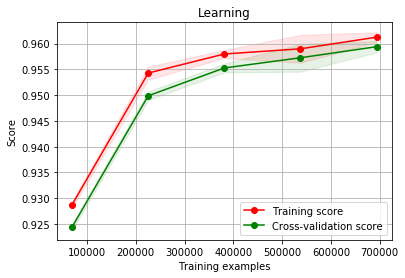

In [40]:
#plot Learning curve
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import learning_curve
plt.figure()
plt.title('Learning')
ylim = None
if ylim is not None:
    plt.ylim(*ylim)
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(
    clf, train, train_labels, cv=None, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")